In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [10]:
# structure
# inputs
#   |
# layer1: u = a0 + a1 * x
#         y = activation_fn(u)
# layer2: v = b0 + b1 * y
#         z = activation_fn(v)
# outputs

# initial parameters
a0, a1 = 0.301444, 0.201954    # parameters of layer 1
b0, b1 = -0.0844103, 0.409993  # parameters of layer 2

In [3]:
# leaning rate
beta = 0.1

In [4]:
# inputs values
inputs = np.array([0.7853, 1.57])
# target values
targets = np.array([0.707, 1.0])

In [7]:
targets

array([0.707, 1.   ])

In [8]:
inputs

array([0.7853, 1.57  ])

In [5]:
# ReLU
def activation_fn(x):
    return np.maximum(0, x)
# derivative of ReLu activation function
def activation_deriv(x):
    return np.where(x>0, 1, 0)

In [6]:
# forward pass
def forward(x, a0, a1, b0, b1):
    u = a0 + a1 * x
    y = activation_fn(u)
    v = b0 + b1 * y
    z = activation_fn(v)
    return u, y, v, z

Loss function (mean squared error: MSE) = (1/2)*(z-t)^2

Derivative's chain rule is applied to simplify calculations:

dL/db0 = (dL/dz) * (dz/dv) * (dv/b0) ......1

dL/dz = d((z-t)^2) / dz = z-t ......2

dz/dv = d(activation_fn(v)) / dv = activation_deriv ......3

dv/b0 = d(b0 + b1 * y) / db0 = 1 ......4

Substitute expression 2,3,4 into expression 1, and finally got dL/db0

In [11]:
# compute gradiants: ∂L/∂b0, ∂L/∂b1, ∂L/∂a0, ∂L/∂a1
def compute_gradients(x, t, u, y, v, z, b1):
    dv = (z - t) * activation_deriv(v)       # ∂L/∂v = ∂L/∂z * ∂z/∂v = ∂(1/2 * (z-t)^2)/∂z * ∂(activation_fn(v))/∂v = (z - t) * activation_deriv
    db0 = dv                                 # ∂L/∂b0 = ∂L/∂v * ∂v/∂b0 = ∂L/∂v * ∂(b0 + b1 * y)/∂b0 = ∂L/∂v * 1
    db1 = dv * y                             # ∂L/∂b1 = ∂L/∂v * ∂v/∂b1 = ∂L/∂v * ∂(b0 + b1 * y)/∂b1 = ∂L/∂v * y
    du = dv * b1 * activation_deriv(u)       # ∂L/∂u
    da0 = du                                 # ∂L/∂a0
    da1 = du * x                             # ∂L/∂a1
    return db0, db1, da0, da1

In [15]:
# batch train
epochs = 50
mse_history = []

for epoch in range(epochs):
    sum_db0 = sum_db1 = sum_da0 = sum_da1 = 0.0

    # sum gradiants
    for x, t in zip(inputs, targets):
        # use old parameters to predict
        u, y, v, z = forward(x, a0, a1, b0, b1)
        # Backpropagation
        db0, db1, da0, da1 = compute_gradients(x, t, u, y, v, z, b1)
        sum_db0 += db0
        sum_db1 += db1
        sum_da0 += da0
        sum_da1 += da1

    # average gradiants and calculate new parameters
    N = len(inputs)
    a0 -= beta * sum_da0 / N
    a1 -= beta * sum_da1 / N
    b0 -= beta * sum_db0 / N
    b1 -= beta * sum_db1 / N

    # use new parameters to predict again
    outputs = np.array([forward(x, a0, a1, b0, b1)[-1] for x in inputs])
    # record loss
    mse = np.mean((outputs - targets) ** 2)
    mse_history.append(mse)

    # print every 10 epochs
    if (epoch + 1) % 10 == 0 or epoch == 0:
        print(f"Epoch {epoch+1:3d}: MSE = {mse:.6f}")

Epoch   1: MSE = 0.090857
Epoch  10: MSE = 0.002023
Epoch  20: MSE = 0.001565
Epoch  30: MSE = 0.001418
Epoch  40: MSE = 0.001284
Epoch  50: MSE = 0.001162



✅ Training complete.
Final weights: a0=0.4525, a1=0.4375, b0=0.2225, b1=0.6564


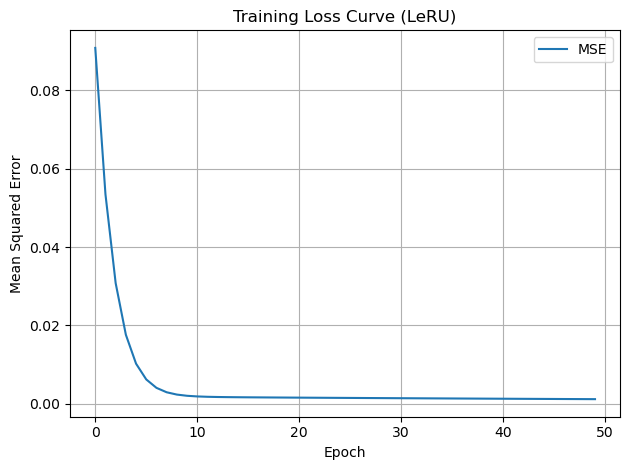

In [16]:
# output
print("\n✅ Training complete.")
print(f"Final weights: a0={a0:.4f}, a1={a1:.4f}, b0={b0:.4f}, b1={b1:.4f}")

# visulize losses
plt.plot(mse_history, label="MSE")
plt.xlabel("Epoch")
plt.ylabel("Mean Squared Error")
plt.title(f"Training Loss Curve (LeRU)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()